In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('bank.csv')

In [4]:
data.head()

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Existing_Loan,Property_Owner,Dependents,Loan_Status
0,59,1622644,795,278471,120,1,0,0,3,1
1,49,704067,666,1134475,240,0,0,1,0,1
2,35,1522329,643,522643,360,1,0,0,2,1
3,28,1069855,581,599813,360,1,1,1,1,1
4,41,1353869,610,717120,180,1,1,1,0,1


In [5]:
# EDA

In [6]:
data.shape

(20000, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                20000 non-null  int64
 1   Annual_Income      20000 non-null  int64
 2   Credit_Score       20000 non-null  int64
 3   Loan_Amount        20000 non-null  int64
 4   Loan_Term          20000 non-null  int64
 5   Employment_Status  20000 non-null  int64
 6   Existing_Loan      20000 non-null  int64
 7   Property_Owner     20000 non-null  int64
 8   Dependents         20000 non-null  int64
 9   Loan_Status        20000 non-null  int64
dtypes: int64(10)
memory usage: 1.5 MB


In [8]:
data.describe()

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Existing_Loan,Property_Owner,Dependents,Loan_Status
count,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,39.953600,1.315254e+06,606.079350,8.372158e+05,128.559600,0.697300,0.503100,0.49840,1.984850,0.807450
std,11.182008,1.336073e+06,150.925145,1.057045e+06,115.187881,0.459438,0.500003,0.50001,1.413372,0.394312
min,21.000000,3.000560e+05,200.000000,5.002700e+04,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,6.884262e+05,494.000000,3.486445e+05,24.000000,0.000000,0.000000,0.00000,1.000000,1.000000
50%,40.000000,1.084240e+06,615.000000,6.540670e+05,60.000000,1.000000,1.000000,0.00000,2.000000,1.000000
75%,50.000000,1.470433e+06,731.000000,9.562208e+05,180.000000,1.000000,1.000000,1.00000,3.000000,1.000000
max,59.000000,9.995522e+06,849.000000,7.995965e+06,360.000000,1.000000,1.000000,1.00000,4.000000,1.000000


In [9]:
data.isnull().sum()

Age                  0
Annual_Income        0
Credit_Score         0
Loan_Amount          0
Loan_Term            0
Employment_Status    0
Existing_Loan        0
Property_Owner       0
Dependents           0
Loan_Status          0
dtype: int64

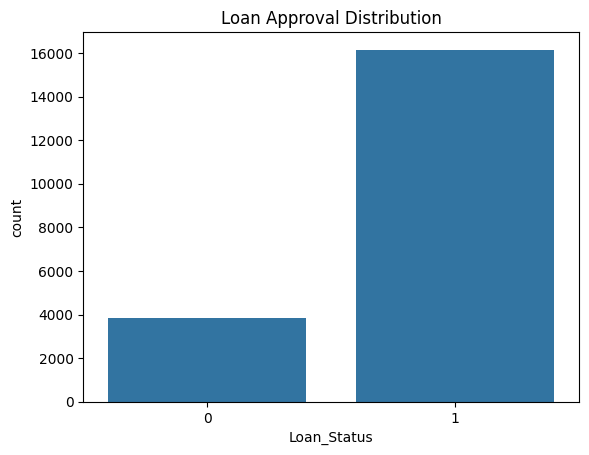

In [10]:
# Target Distribution

sns.countplot(x='Loan_Status', data=data)
plt.title("Loan Approval Distribution")
plt.show()

<Axes: >

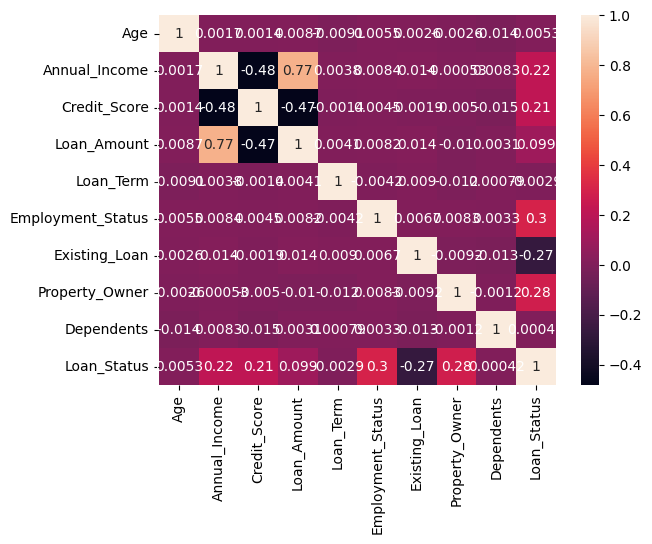

In [11]:
# Correlation Heatmap

sns.heatmap(data.corr(),annot=True)

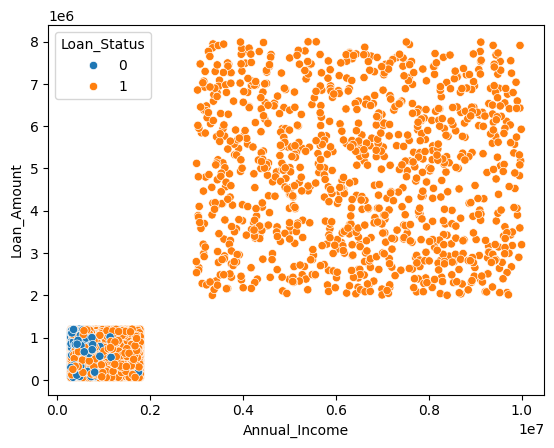

In [12]:
# Income vs Loan Amount

sns.scatterplot(x='Annual_Income', y='Loan_Amount', hue='Loan_Status', data=data)
plt.show()

In [13]:
# Outlier Detection 

def checkOutliers(data, column):
    plt.figure(figsize=(30, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(data[column])
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=data[column], kde=True)
    plt.axvline(data[column].mean()+3*data[column].std())
    plt.axvline(data[column].mean()-3*data[column].std())

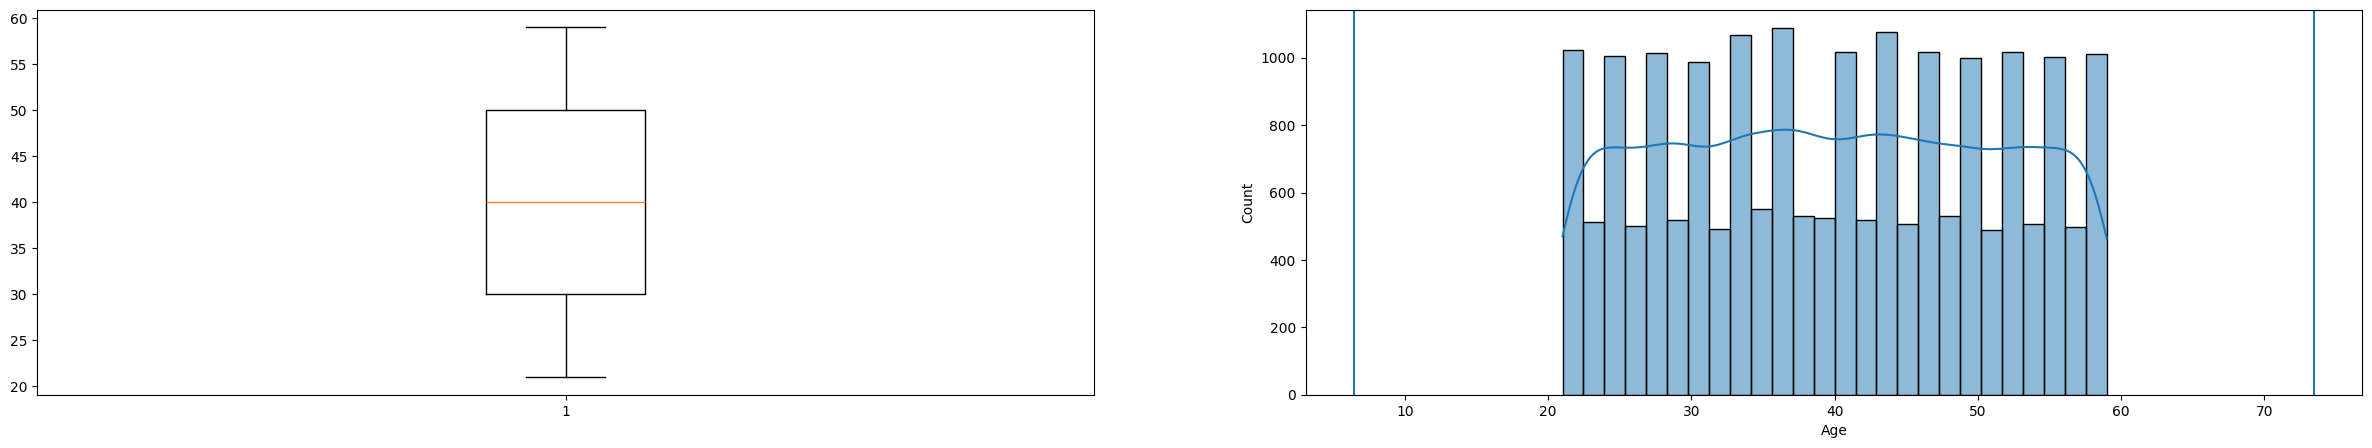

In [14]:
checkOutliers(data, "Age")

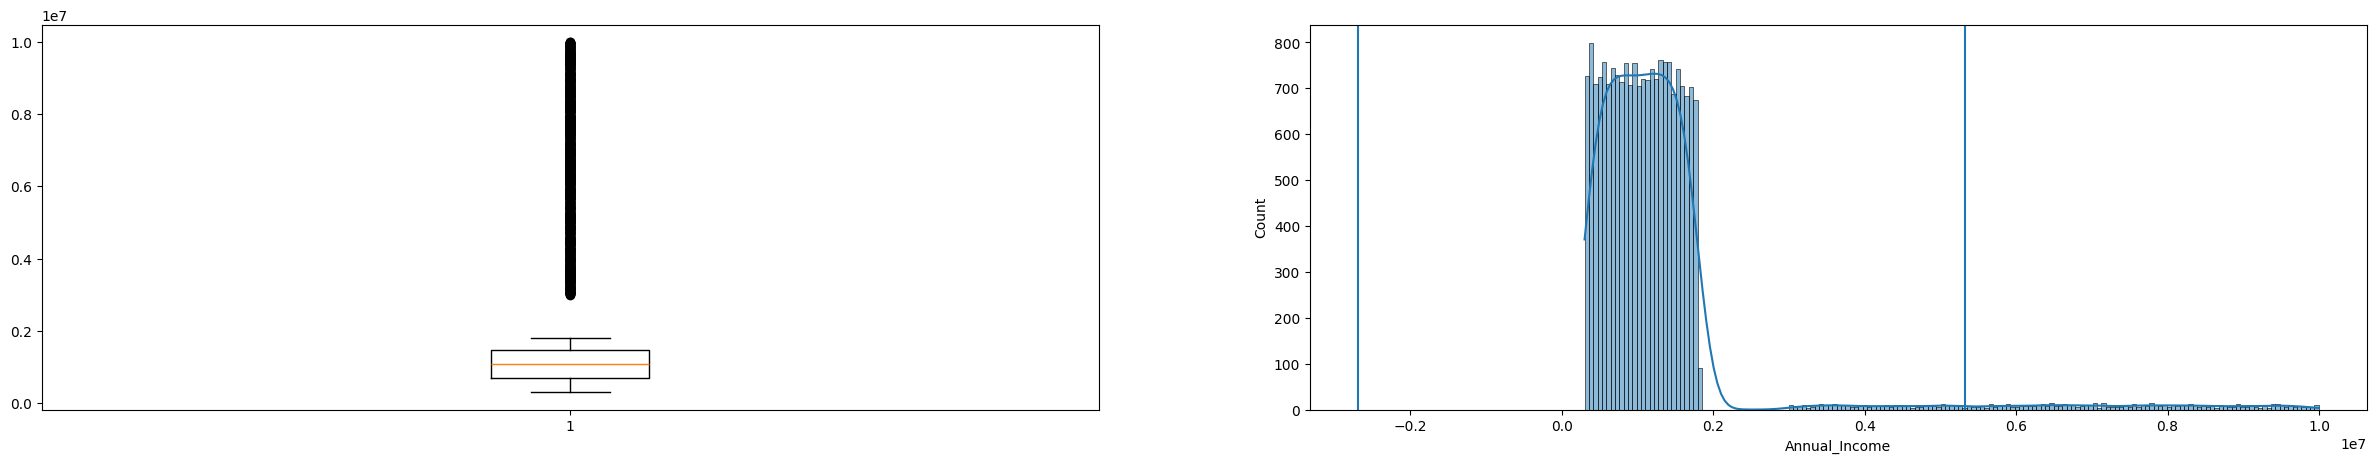

In [15]:
checkOutliers(data, "Annual_Income")

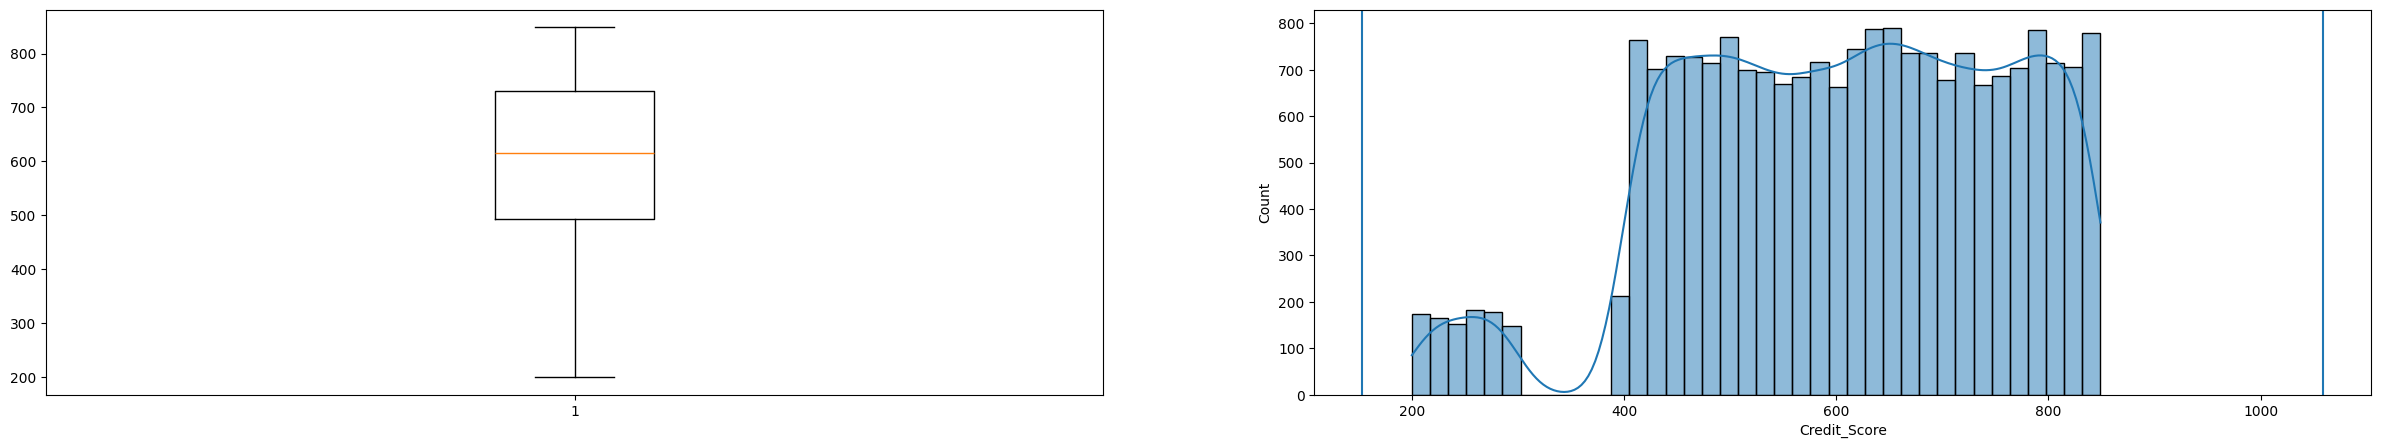

In [16]:
checkOutliers(data, "Credit_Score")

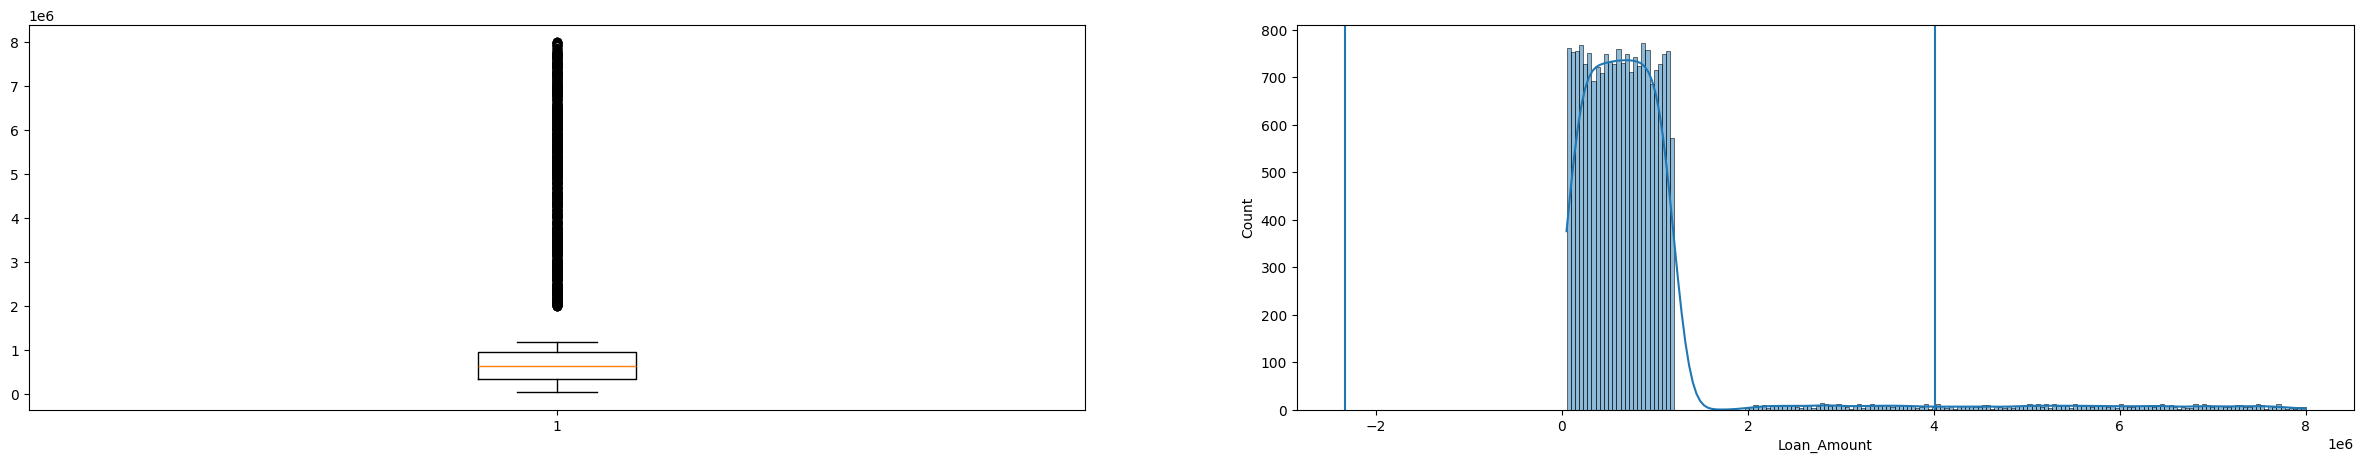

In [17]:
checkOutliers(data, "Loan_Amount")

In [20]:
# Handle Outliers

def handleoutliers(data, column):
  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
   
    IQR = Q3 - Q1
    
   
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
   
    data.loc[data[column]>upper_limit,column]=upper_limit
    data.loc[data[column]<lower_limit,column]=lower_limit

In [21]:
handleoutliers(data,"Annual_Income")

C:\Users\Ajinkya Suroshe\AppData\Local\Temp\ipykernel_7772\923765406.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2643443.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column]>upper_limit,column]=upper_limit


In [22]:
handleoutliers(data,"Loan_Amount")

C:\Users\Ajinkya Suroshe\AppData\Local\Temp\ipykernel_7772\923765406.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1867585.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column]>upper_limit,column]=upper_limit


In [23]:
data.drop(['Age','Dependents'],inplace= True, axis = 1)

In [24]:
# Feature & Target Split

X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

In [25]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Imbalanced data

data["Loan_Status"].value_counts()

Loan_Status
1    16149
0     3851
Name: count, dtype: int64

In [28]:
# Handle Imbalanced data

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [29]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
Loan_Status
1    11299
0     2701
Name: count, dtype: int64


In [30]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
Loan_Status
1    11299
0     2701
Name: count, dtype: int64


In [31]:
print("After SMOTE:")
print(y_train_sm.value_counts())

After SMOTE:
Loan_Status
1    11299
0    11299
Name: count, dtype: int64


In [32]:
# Logistic Regression

In [33]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [34]:
y_pred = model.predict(X_test)

In [35]:
prob = model.predict_proba(X_test)

In [36]:
print("testing Accuracy:", accuracy_score(y_test, y_pred))

testing Accuracy: 0.9741666666666666


In [37]:
train_pred = model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred))

Training Accuracy: 0.9866428571428572


In [38]:
print(confusion_matrix(y_test, y_pred))

[[1059   91]
 [  64 4786]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1150
           1       0.98      0.99      0.98      4850

    accuracy                           0.97      6000
   macro avg       0.96      0.95      0.96      6000
weighted avg       0.97      0.97      0.97      6000



In [40]:
# Cross Validate

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
knn = KNeighborsClassifier()
val_result = cross_validate(knn, X_train, y_train,cv=9)
val_result

{'fit_time': array([0.04201365, 0.05162811, 0.05210114, 0.05261183, 0.05437183,
        0.04792976, 0.04966474, 0.04819036, 0.04394054]),
 'score_time': array([0.0711019 , 0.07137465, 0.07840848, 0.0675447 , 0.07219362,
        0.06864905, 0.08096123, 0.06883192, 0.07333851]),
 'test_score': array([0.97365039, 0.97172237, 0.97043702, 0.97750643, 0.97236504,
        0.97299035, 0.98006431, 0.97684887, 0.98135048])}

In [41]:
train_acc = val_result['test_score'].mean()
print("Training acc:", train_acc)

Training acc: 0.9425721727646028


In [43]:
import pickle
with open("loan.pkl","wb") as f:
    pickle.dump(model,f)

In [44]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

In [45]:
data.head()

,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Existing_Loan,Property_Owner,Loan_Status
0,1622644.0,795,278471.0,120,1,0,0,1
1,704067.0,666,1134475.0,240,0,0,1,1
2,1522329.0,643,522643.0,360,1,0,0,1
3,1069855.0,581,599813.0,360,1,1,1,1
4,1353869.0,610,717120.0,180,1,1,1,1


In [46]:
data.tail()

,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Existing_Loan,Property_Owner,Loan_Status
19995,1153439.0,732,763409.0,12,1,0,0,1
19996,1685274.0,810,58564.0,360,0,1,1,1
19997,591760.0,685,663726.0,60,0,0,0,0
19998,1248275.0,445,370391.0,360,1,0,1,1
19999,1497460.0,795,317008.0,240,1,0,0,1
